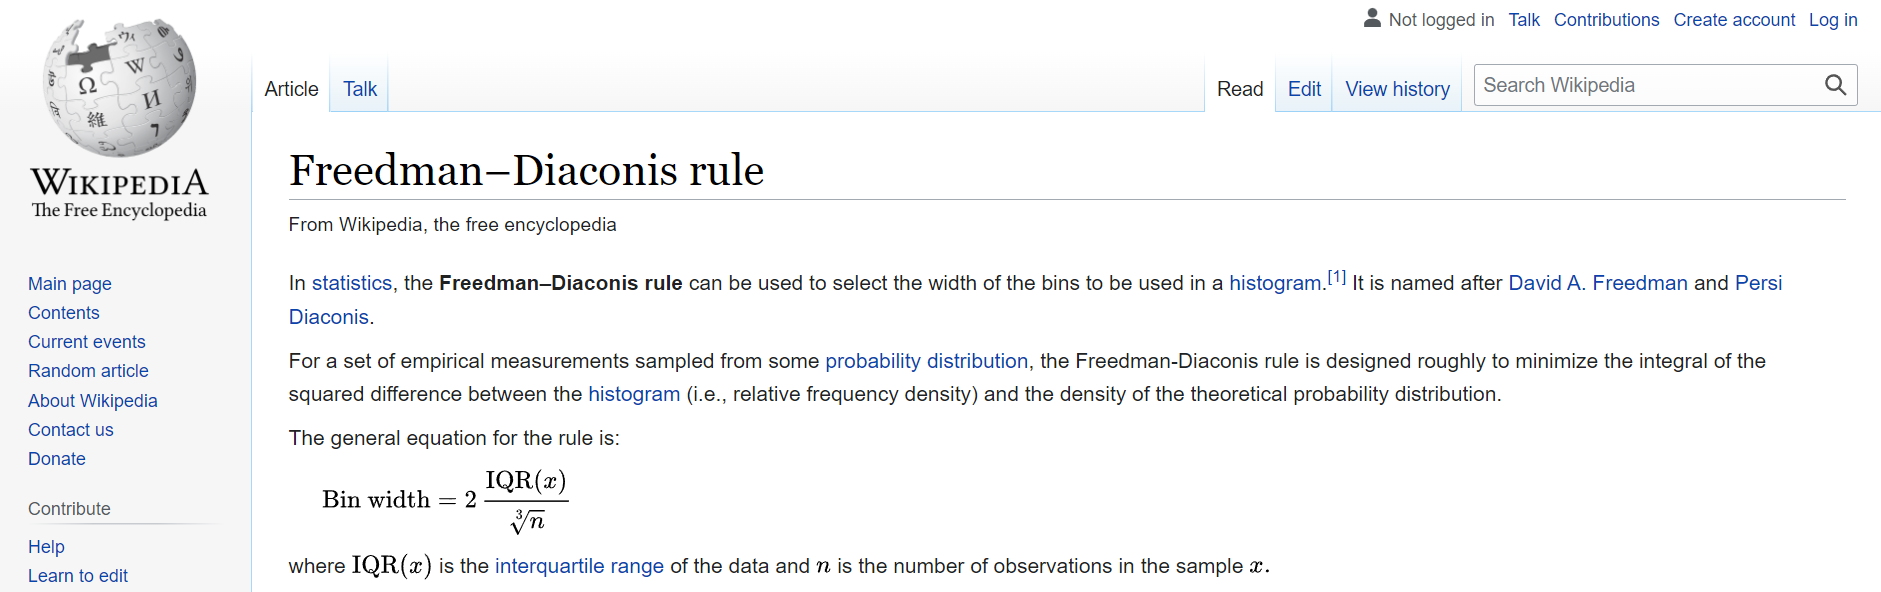

In [1]:
import numpy as np
from scipy import stats


def G_freedman_diaconis(data, coef = 2):
    """

    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.
        
    for Generelized freedman_diaconis I consider coeficient (default = 2)

    this function returns a tuple including: {"width", "bins","Nbins" }
        "width", return the estimated width for each histogram bin. 
        "Nbins", return the number of bins suggested by rule.
        "bins", return the bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    datmin, datmax = data.min(), data.max()
    datrng = datmax - datmin
    
    bw   = (coef * IQR) / np.power(N, 1/3)
    Nbins = int((datrng / bw) + 1) 
    Bins = np.arange(datmin, datmax,bw)

    return (bw,Nbins,Bins)

In [2]:
# Test data
mu, sigma = 0, 0.1 
data = np.random.normal(mu, sigma, 1000)

In [5]:
G_freedman_diaconis(data)

(0.027332889331019333,
 22,
 array([-0.31404548, -0.28671259, -0.2593797 , -0.23204681, -0.20471392,
        -0.17738103, -0.15004814, -0.12271525, -0.09538236, -0.06804947,
        -0.04071658, -0.01338369,  0.0139492 ,  0.04128209,  0.06861497,
         0.09594786,  0.12328075,  0.15061364,  0.17794653,  0.20527942,
         0.23261231,  0.2599452 ]))

In [6]:
np.histogram_bin_edges(data, bins='fd')[1]-np.histogram_bin_edges(data, bins='fd')[0]

0.027021215343567495

In [8]:
G_freedman_diaconis(data,4)

(0.054665778662038665,
 11,
 array([-0.31404548, -0.2593797 , -0.20471392, -0.15004814, -0.09538236,
        -0.04071658,  0.0139492 ,  0.06861497,  0.12328075,  0.17794653,
         0.23261231]))